In [25]:
"""
Data Clean
imapinvasives
Invasive species data
"""
import pandas as pd
import numpy as np

#Clean imapinvasives
file_name = "imapinvasives_bugs.csv"
df = pd.read_csv(file_name)
df = df[['x','y','common_name',\
                 'confirmed_ind','observation_date',\
                'species_type','growth_habit','county']]
df = df.rename(columns = {'x':'lon','y':'lat'})


df = df.loc[(df['county'] == "Queens") | (df['county'] == "New York") | \
            (df['county'] == "Kings") | (df['county'] == "Bronx") | \
            (df['county'] == "Richmond")]

df = df.loc[df['confirmed_ind']==True]
df = df.loc[df['growth_habit']=='Plant Pest']

df = df.drop(columns = ['confirmed_ind','growth_habit','species_type'])
df['common_name'].unique()
df.to_csv("invasive_nyc.csv",encoding='utf-8', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 21 to 1455
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lon               1247 non-null   float64
 1   lat               1247 non-null   float64
 2   common_name       1247 non-null   object 
 3   observation_date  1247 non-null   object 
 4   county            1247 non-null   object 
dtypes: float64(2), object(3)
memory usage: 58.5+ KB


In [26]:
"""
Data Clean
imapinvasives
Invasive species data
one hot encoding
"""
import pandas as pd
import numpy as np
file_name = "invasive_nyc.csv"
in_df = pd.read_csv(file_name)
in_one = pd.get_dummies(data = in_df,columns = ['common_name'],prefix='', prefix_sep='')
in_one.head()

#in_one.to_csv("invasive_bugs.csv",encoding='utf-8', index=False)

lon        lat observation_date    county  \
0 -73.972962  40.779063      01-Oct-2021  New York   
1 -73.972922  40.779113      01-Oct-2021  New York   
2 -73.973013  40.779075      01-Oct-2021  New York   
3 -73.972862  40.779033      01-Oct-2021  New York   
4 -73.998684  40.652943      30-Sep-2021     Kings   

   Brown Marmorated Stink Bug  Emerald Ash Borer  Hemlock Woolly Adelgid  \
0                           0                  0                       0   
1                           0                  0                       0   
2                           0                  0                       0   
3                           0                  0                       0   
4                           0                  0                       0   

   Spotted Lanternfly  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

<AxesSubplot:title={'center':'Invasive Animal Records'}, xlabel='common_name', ylabel='count'>

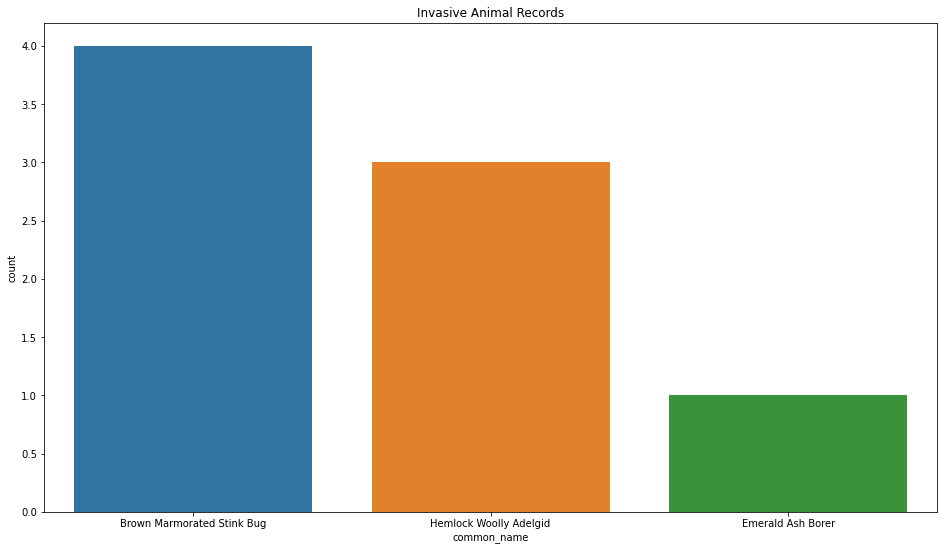

In [29]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
#most bugs
nslf_df = df.loc[df['common_name'] != 'Spotted Lanternfly']
plt.figure(figsize=(16,9))
plt.title('Invasive Animal Records')
sn.countplot(data = nslf_df, x = 'common_name', order = nslf_df['common_name'].value_counts().index)

In [32]:
#drop rows that aren't Spotted lanternfly (SLF)
slf = in_one

slf = slf.loc[slf['Spotted Lanternfly']==1]

slf = slf.drop(columns = ['Brown Marmorated Stink Bug',\
                        'Hemlock Woolly Adelgid',\
                        'Emerald Ash Borer'])
#slf.to_csv("slf_nyc.csv",encoding='utf-8', index=False)

In [33]:
#Trees Data
import pandas as pd
import numpy as np
file_name = '2015_tree.csv'
tree_df = pd.read_csv(file_name)
tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [36]:
tree_df.head(5)
#tree_df.head(5).to_csv("sample_tree.csv",encoding='utf-8', index=False)

tree_id  block_id  created_at  tree_dbh  stump_diam curb_loc status health  \
0   180683    348711  08/27/2015         3           0   OnCurb  Alive   Fair   
1   200540    315986  09/03/2015        21           0   OnCurb  Alive   Fair   
2   204026    218365  09/05/2015         3           0   OnCurb  Alive   Good   
3   204337    217969  09/05/2015        10           0   OnCurb  Alive   Good   
4   189565    223043  08/30/2015        21           0   OnCurb  Alive   Good   

                            spc_latin       spc_common  ...  boro_ct  \
0                         Acer rubrum        red maple  ...  4073900   
1                   Quercus palustris          pin oak  ...  4097300   
2  Gleditsia triacanthos var. inermis      honeylocust  ...  3044900   
3  Gleditsia triacanthos var. inermis      honeylocust  ...  3044900   
4                     Tilia americana  American linden  ...  3016500   

      state   latitude  longitude         x_sp         y_sp council district  \
0  New York  40.723092 -73.844215  1027431.148  202756.7687             29.0   
1  New York  40.794111 -73.818679  1034455.701  228644.8374             19.0   
2  New York  40.717581 -73.936608  1001822.831  200716.8913             34.0   
3  New York  40.713537 -73.934456  1002420.358  199244.2531             34.0   
4  New York  40.666778 -73.975979   990913.775  182202.4260             39.0   

  census tract        bin           bbl  
0        739.0  4052307.0  4.022210e+09  
1        973.0  4101931.0  4.044750e+09  
2        449.0  3338310.0  3.028870e+09  
3        449.0  3338342.0  3.029250e+09  
4        165.0  3025654.0  3.010850e+09  

[5 rows x 45 columns]

In [48]:
tree_df = tree_df[['tree_id','latitude','longitude'\
                   ,'tree_dbh','status','health',\
                   'spc_latin','borough','nta_name']]

#tree_df = tree_df.rename(columns= {'latitude':'lat','longitude':'lon'})
tree_df.head()
#tree_df.to_csv("tree2015.csv",encoding='utf-8', index=False)

IndentationError: unexpected indent (2754882314.py, line 2)

In [38]:
tree_df['problems'].unique()

array(['None', 'Stones', 'MetalGrates', 'RootOther', 'Stones,BranchOther',
       'TrunkLights,BranchLights', 'RootOther,TrunkOther,BranchOther',
       'BranchOther', 'Stones,BranchLights', 'TrunkOther,BranchLights',
       'MetalGrates,TrunkOther', nan, 'TrunkOther', 'Stones,WiresRope',
       'BranchLights', 'WiresRope,BranchOther', 'RootOther,BranchOther',
       'Stones,WiresRope,BranchLights', 'WiresRope',
       'WiresRope,BranchLights', 'Stones,TrunkOther',
       'WiresRope,TrunkLights,BranchLights', 'Stones,RootOther',
       'Stones,BranchLights,BranchOther', 'Stones,RootOther,BranchLights',
       'MetalGrates,BranchOther', 'Stones,RootOther,TrunkOther',
       'RootOther,TrunkOther',
       'Stones,TrunkOther,BranchLights,BranchOther',
       'Stones,TrunkOther,BranchOther', 'RootOther,BranchLights',
       'TrunkOther,BranchOther', 'RootOther,WiresRope,BranchLights',
       'Stones,TrunkOther,BranchLights', 'BranchLights,Sneakers',
       'Stones,RootOther,TrunkOther,Bran

In [50]:
file_name = 'tree2015.csv'
tree_df = pd.read_csv(file_name)
tree_df.head()

tree_id        lat        lon  tree_dbh status health  \
0   180683  40.723092 -73.844215         3  Alive   Fair   
1   200540  40.794111 -73.818679        21  Alive   Fair   
2   204026  40.717581 -73.936608         3  Alive   Good   
3   204337  40.713537 -73.934456        10  Alive   Good   
4   189565  40.666778 -73.975979        21  Alive   Good   

                            spc_latin   borough            nta_name  
0                         Acer rubrum    Queens        Forest Hills  
1                   Quercus palustris    Queens          Whitestone  
2  Gleditsia triacanthos var. inermis  Brooklyn   East Williamsburg  
3  Gleditsia triacanthos var. inermis  Brooklyn   East Williamsburg  
4                     Tilia americana  Brooklyn  Park Slope-Gowanus

In [51]:
tree_df['health'].unique()

array(['Fair', 'Good', 'Poor', nan], dtype=object)

In [52]:
tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tree_id    683788 non-null  int64  
 1   lat        683788 non-null  float64
 2   lon        683788 non-null  float64
 3   tree_dbh   683788 non-null  int64  
 4   status     683788 non-null  object 
 5   health     652172 non-null  object 
 6   spc_latin  652169 non-null  object 
 7   borough    683788 non-null  object 
 8   nta_name   683788 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 47.0+ MB


<AxesSubplot:title={'center':'Tree Health'}, xlabel='health', ylabel='count'>

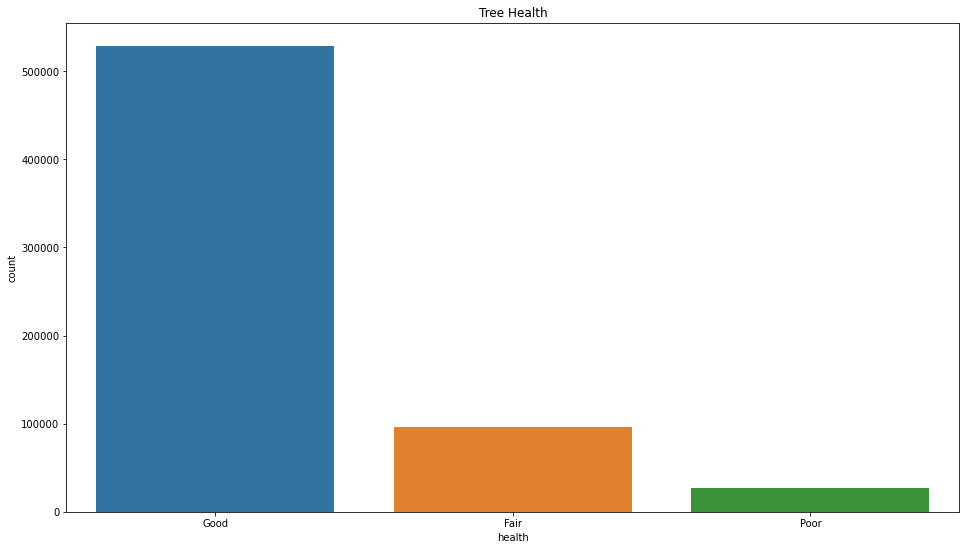

In [53]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
#most bugs

plt.figure(figsize=(16,9))
plt.title('Tree Health')
sn.countplot(data = tree_df, x = 'health', order = tree_df['health'].value_counts().index)

In [55]:
#impute NA health to good because majority, make fair good, keep poor
na_health = tree_df.loc[tree_df['health'].isnull()]
na_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31616 entries, 37 to 683699
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tree_id    31616 non-null  int64  
 1   lat        31616 non-null  float64
 2   lon        31616 non-null  float64
 3   tree_dbh   31616 non-null  int64  
 4   status     31616 non-null  object 
 5   health     0 non-null      object 
 6   spc_latin  2 non-null      object 
 7   borough    31616 non-null  object 
 8   nta_name   31616 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.4+ MB


In [57]:
na_health.head()

tree_id        lat        lon  tree_dbh status health spc_latin  \
37    211205  40.774993 -73.922037         0  Stump    NaN       NaN   
57    187807  40.871927 -73.882349         0   Dead    NaN       NaN   
196   208322  40.705742 -73.917849        10   Dead    NaN       NaN   
209   209058  40.559061 -74.106038         6   Dead    NaN       NaN   
239   203597  40.772483 -73.909073         0  Stump    NaN       NaN   

           borough               nta_name  
37          Queens               Steinway  
57           Bronx                Norwood  
196       Brooklyn         Bushwick North  
209  Staten Island  Oakwood-Oakwood Beach  
239         Queens               Steinway

<AxesSubplot:title={'center':'NA Health'}, xlabel='status', ylabel='count'>

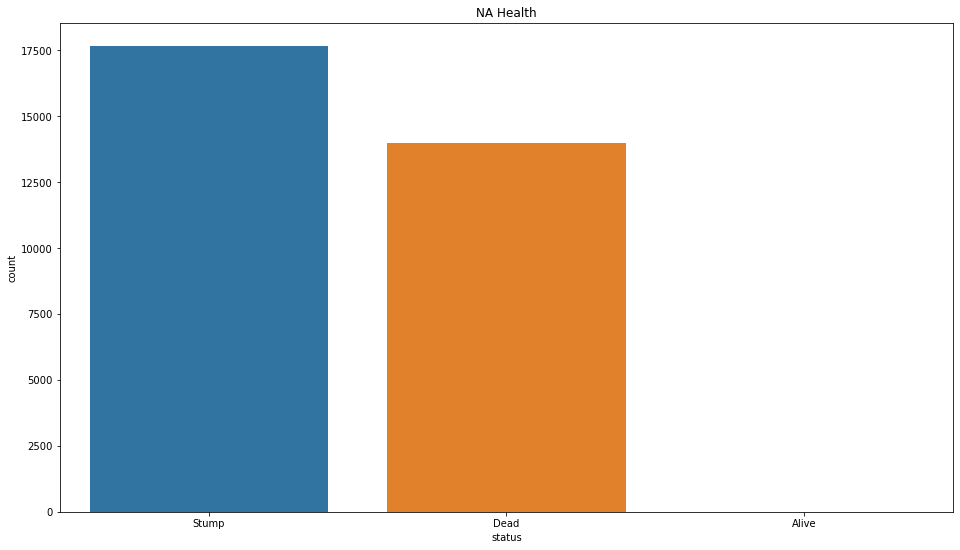

In [60]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
#most bugs
plt.figure(figsize=(16,9))
plt.title('NA Health')
sn.countplot(data = na_health, x = 'status', order = na_health['status'].value_counts().index)

In [67]:
#Trees Data
import pandas as pd
import numpy as np
file_name = 'tree2015.csv'
tree_df = pd.read_csv(file_name)


tree_df['health'] = tree_df['health'].fillna('Dead')
dictionary = {'Good':3,'Fair':2,'Poor':1,'Dead':0}
tree_df.replace({'health':dictionary})
tree_df['spc_latin'] = tree_df['spc_latin'].fillna('Dead')
tree_df.info()
#tree_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tree_id    683788 non-null  int64  
 1   lat        683788 non-null  float64
 2   lon        683788 non-null  float64
 3   tree_dbh   683788 non-null  int64  
 4   status     683788 non-null  object 
 5   health     683788 non-null  object 
 6   spc_latin  683788 non-null  object 
 7   borough    683788 non-null  object 
 8   nta_name   683788 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 47.0+ MB


In [69]:
tree_df['spc_latin'].unique()

array(['Acer rubrum', 'Quercus palustris',
       'Gleditsia triacanthos var. inermis', 'Tilia americana',
       'Platanus x acerifolia', 'Ginkgo biloba', 'Quercus phellos',
       'Acer pseudoplatanus', 'Acer ginnala', 'Dead', 'Acer campestre',
       'Ulmus americana', 'Fraxinus', 'Malus', 'Acer saccharinum',
       'Corylus colurna', 'Prunus serotina', 'Juniperus virginiana',
       'Acer platanoides', 'Liriodendron tulipifera',
       'Quercus acutissima', 'Quercus bicolor', 'Styphnolobium japonicum',
       'Chionanthus retusus', 'Magnolia grandiflora',
       'Liquidambar styraciflua', 'Pyrus calleryana', 'Quercus coccinea',
       'Chamaecyparis thyoides', 'Quercus velutina', 'Zelkova serrata',
       'Quercus alba', 'Aesculus glabra', 'Quercus rubra',
       'Tilia tomentosa', 'Carya glabra', 'Cladrastis kentukea', 'Morus',
       'Pseudotsuga menziesii', 'Lagerstroemia', 'Sassafras albidum',
       'Prunus', 'Picea', 'Ulmus parvifolia', 'Aesculus hippocastanum',
       'Ilex'

In [78]:
tree_df['spc_latin'] = tree_df['spc_latin'].str.split().str[0]
tree_df['spc_latin'].unique()

array(['Acer', 'Quercus', 'Gleditsia', 'Tilia', 'Platanus', 'Ginkgo',
       'Dead', 'Ulmus', 'Fraxinus', 'Malus', 'Corylus', 'Prunus',
       'Juniperus', 'Liriodendron', 'Styphnolobium', 'Chionanthus',
       'Magnolia', 'Liquidambar', 'Pyrus', 'Chamaecyparis', 'Zelkova',
       'Aesculus', 'Carya', 'Cladrastis', 'Morus', 'Pseudotsuga',
       'Lagerstroemia', 'Sassafras', 'Picea', 'Ilex', 'Pinus', 'Nyssa',
       'Syringa', 'Eucommia', 'Koelreuteria', 'Juglans', 'Salix',
       'Cercidiphyllum', 'Robinia', 'Parrotia', 'Cornus', 'Castanea',
       'Gymnocladus', 'Styrax', 'Thuja', 'Cercis', 'Ailanthus',
       'Carpinus', 'Populus', 'Tsuga', 'Betula', 'Cedrus', 'Paulownia',
       'Crataegus', 'Catalpa', 'Fagus', 'Phellodendron', 'Cotinus',
       'Ostrya', 'Larix', 'Taxodium', 'Metasequoia', 'Celtis',
       'Amelanchier', 'Maclura', 'Alnus', 'Maackia', 'Halesia', 'Albizia'],
      dtype=object)

In [86]:
tree_df = tree_df.replace({'health':dictionary})
tree_df['status'].unique()
tree_df = tree_df.drop(columns='status')
#tree_df.head()
tree_df.to_csv("nyc_tree.csv",encoding='utf-8', index=False)

In [87]:
tree_df.head()

tree_id        lat        lon  tree_dbh  health  spc_latin   borough  \
0   180683  40.723092 -73.844215         3       2       Acer    Queens   
1   200540  40.794111 -73.818679        21       2    Quercus    Queens   
2   204026  40.717581 -73.936608         3       3  Gleditsia  Brooklyn   
3   204337  40.713537 -73.934456        10       3  Gleditsia  Brooklyn   
4   189565  40.666778 -73.975979        21       3      Tilia  Brooklyn   

             nta_name  
0        Forest Hills  
1          Whitestone  
2   East Williamsburg  
3   East Williamsburg  
4  Park Slope-Gowanus

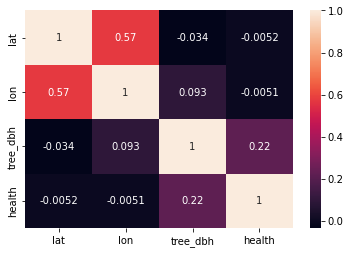

In [91]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_tree = tree_df[['lat','lon','tree_dbh','health']]

corr_matrix = corr_tree.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()